## Salary_hike -> Build a prediction model for Salary_hike

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# import dataset
dataset = pd.read_csv(r"C:\Users\Mohan Patil\OneDrive\Desktop\Datasets\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA And Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

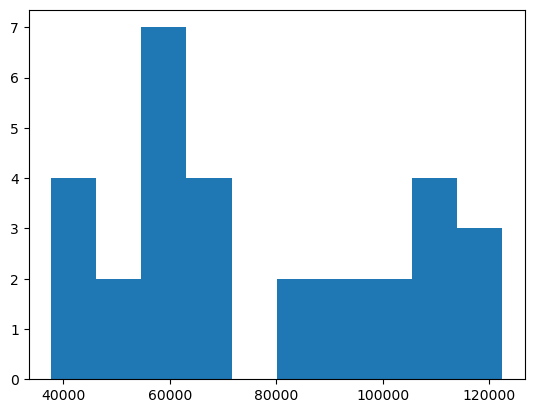

In [5]:
plt.hist(dataset.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dbea3398e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dbe9f59220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dbea3397c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dbea3420d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dbea342b80>],
 'means': []}

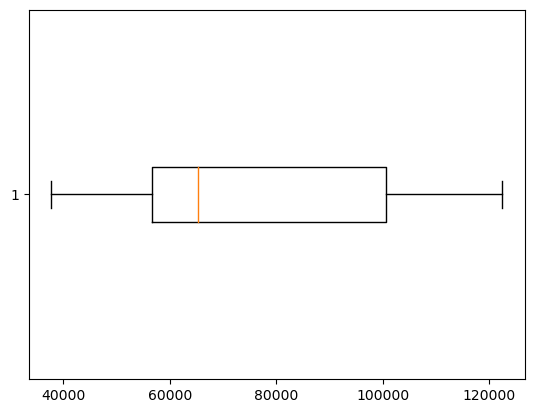

In [7]:
plt.boxplot(dataset.Salary,0,"rs",0)

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

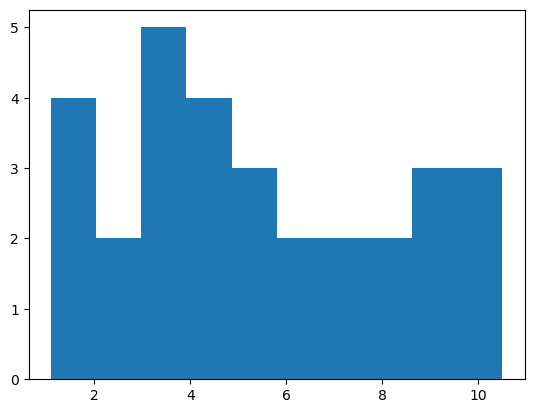

In [8]:
plt.hist(dataset.YearsExperience)

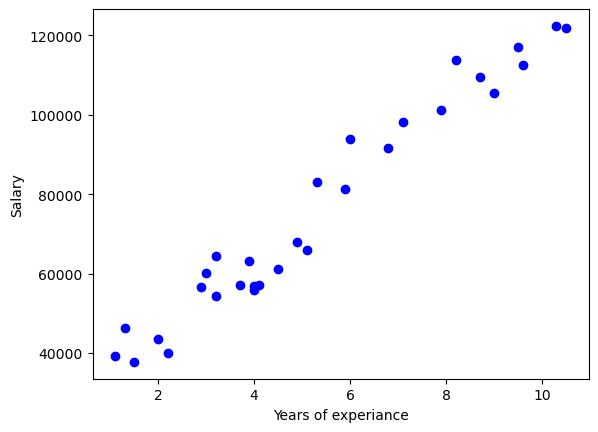

In [9]:
plt.plot(dataset.YearsExperience,dataset.Salary,"bo")
plt.xlabel('Years of experiance')
plt.ylabel('Salary')
plt.show()

C:\Users\Mohan Patil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

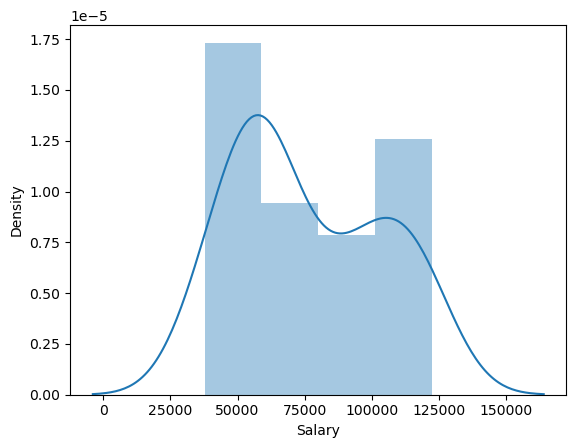

In [5]:
sns.distplot(dataset['Salary'])

## Correlation Analysis

In [11]:
dataset.Salary.corr(dataset.YearsExperience)

0.9782416184887598

In [12]:
np.corrcoef(dataset.Salary,dataset.YearsExperience)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

## Build Linear Regression Model

In [13]:
model = smf.ols("Salary~YearsExperience",data=dataset)
model = model.fit()
# ols = Ordinary least Square = y-Dependant Variable-Salary and x - Independant Variable-YearExp

In [14]:
# Coefficient parameter
model.params
# y-intercept (B0)-25792.200199
# YearsExperience is Coeff.of Reg line (B1)-9449.962321

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        14:11:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Reg.Equ : Salary=B0+B1*YearsExperience

In [19]:
model.conf_int(0.05) # 95% Confidence Interval

,0,1
Intercept,21136.061314,30448.339084
YearsExperience,8674.118747,10225.805896


In [17]:
# Finding p_value And t_value
model.pvalues,model.tvalues

(Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64,
 Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64)

In [18]:
# Finding RSquared Values
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [38]:
pred = model.predict(pd.DataFrame(dataset['YearsExperience']))
pred.corr(dataset.Salary)

0.9782416184887601

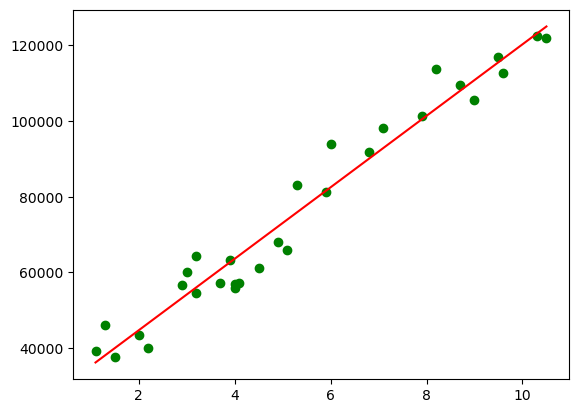

In [41]:
plt.scatter(x=dataset['YearsExperience'],y=dataset['Salary'],color='green');
plt.plot(dataset['YearsExperience'],pred,color='red')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

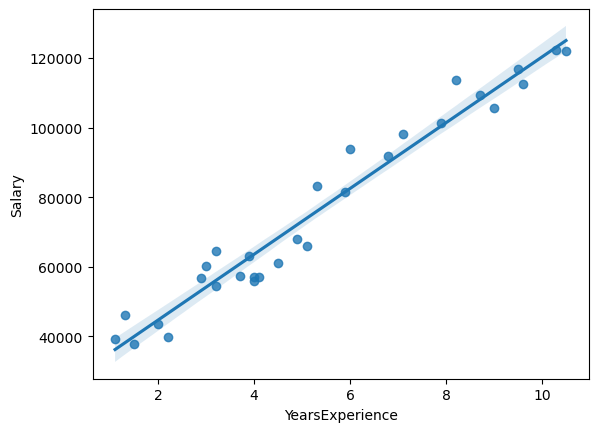

In [20]:
sns.regplot(x="YearsExperience",y="Salary",data=dataset)

## Model Prediction

In [21]:
# Model Prediction for 3 Years exp.
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [22]:
# Automatic Predcition for 3 And 6 Years

In [23]:
new_data = pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [24]:
data_pred = pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [25]:
 model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

### Transforming variables for accuracy

In [29]:
model_2 = smf.ols('Salary~np.log(YearsExperience)',data=dataset).fit()
model_2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [30]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           3.25e-13
Time:                        14:33:09   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
print(model_2.conf_int(0.01)) # 99% confidence level

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [32]:
# Reg.Equ : Salary=B0+B1*YearsExperience

In [35]:
# Finding p_value And t_value
model_2.pvalues,model_2.tvalues

(Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64,
 Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64)

In [37]:
pred2 = model_2.predict(pd.DataFrame(dataset['YearsExperience']))
pred2.corr(dataset.Salary)

0.924061081788264

In [39]:
# Model2 Prediction for 3 Years exp.
Salary = (14927.97177) + (40581.98796)*(3)
Salary

136673.93565

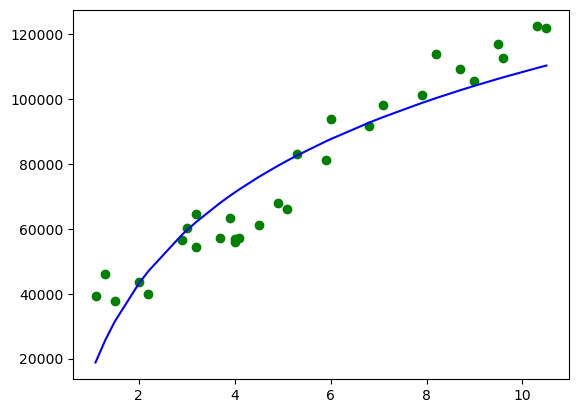

In [40]:
plt.scatter(x=dataset['YearsExperience'],y=dataset['Salary'],color='green');
plt.plot(dataset['YearsExperience'],pred2,color='blue')

### Exponential Tranformation-model3

In [42]:
model_3 = smf.ols('np.log(Salary)~YearsExperience',data=dataset).fit()
model_3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [43]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           7.03e-18
Time:                        14:51:47   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
print(model_3.conf_int(0.01)) # 99% confidence level

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


In [48]:
pred_3 = model_3.predict(pd.DataFrame(dataset['YearsExperience']))
pred3 =np.exp(pred_3)# we have used log(Salary) in preparing model so we need to convert it back
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [49]:
pred3.corr(dataset.Salary)

0.9660469705377085

In [51]:
# Model3 Prediction for 3 Years exp.
Salary = (10.507402) + (0.125453)*(3)
Salary

10.883761000000002

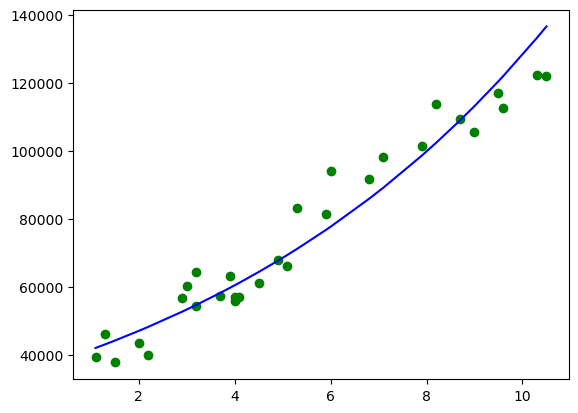

In [52]:
plt.scatter(x=dataset['YearsExperience'],y=dataset['Salary'],color='green');
plt.plot(dataset['YearsExperience'],pred3,color='blue')

In [54]:
resid_3 = pred3-dataset.Salary
resid_3

0      2655.957468
1     -3138.933206
2      6429.289228
3      3494.029189
4      8322.688474
5     -4002.857528
6     -6846.324614
7       213.014935
8     -9786.985065
9      1007.330788
10    -3543.017097
11     4634.338456
12     3471.338456
13     4110.204604
14     3229.199291
15     -286.753851
16     3341.128712
17   -11955.315365
18    -4669.369220
19   -16278.164960
20    -5877.295792
21    -9119.274607
22    -2736.190409
23   -11465.889488
24     -459.459242
25     7568.933364
26     3506.819601
27     9361.743836
28    10803.621344
29    14706.829694
dtype: float64

In [56]:
salary_resid=model_3.resid_pearson
salary_resid

array([-0.66732261,  0.71866312, -1.60729238, -0.78878267, -1.9356925 ,
        0.74867647,  1.23436001, -0.0398886 ,  1.68260228, -0.17836411,
        0.58917114, -0.81508595, -0.60434465, -0.71028167, -0.52600626,
        0.04320755, -0.50424366,  1.58695853,  0.60373565,  1.94386552,
        0.6763497 ,  0.99482518,  0.27970841,  1.0847233 ,  0.04297985,
       -0.70724335, -0.30175692, -0.81559685, -0.86410542, -1.1638191 ])